In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/student_scores.csv')

In [3]:
df.columns = ['Study_hours', 'Test_scores']
df.head()

,Study_hours,Test_scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.dtypes

Study_hours    float64
Test_scores      int64
dtype: object

In [8]:
df.corr()

,Study_hours,Test_scores
Study_hours,1.000000,0.975843
Test_scores,0.975843,1.000000


Text(0, 0.5, 'Student scores')

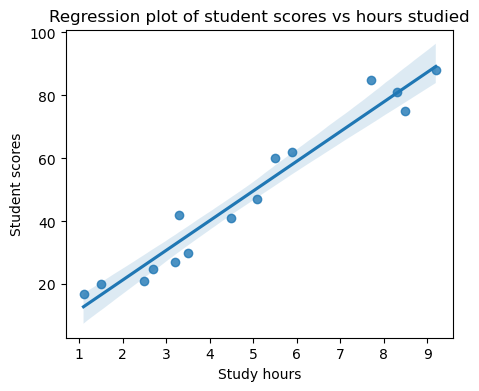

In [10]:
plt.figure(figsize=(5, 4))
sns.regplot(x='Study_hours', y='Test_scores', data=df)
plt.title('Regression plot of student scores vs hours studied')
plt.xlabel('Study hours')
plt.ylabel('Student scores')

In [12]:
lr = LinearRegression()
X = df[['Study_hours']]
y = df['Test_scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
test_prediction = lr.predict(X_test)
train_prediction = lr.predict(X_train)

In [33]:
mse_test = mean_squared_error(y_test, test_prediction)
r2_test = r2_score(y_test, test_prediction)
print(f'Mean squared error: {mse_test}')
print(f'R-squared: {r2_test}')


Mean squared error: 22.662007472534466
R-squared: 0.9334774731725994


In [35]:
mse_train = mean_squared_error(y_train, train_prediction)
r2_train = r2_score(y_train, train_prediction)
print(f'Mean squared error: {mse_train}')
print(f'R-squared: {r2_train}')

Mean squared error: 30.908765874114792
R-squared: 0.9499650128056598


In [30]:
Study_hour = [[2]]
prediction = lr.predict(Study_hour)
print(f"Predicted score for 6.5 hours of study: {prediction[0]:.2f}")

Predicted score for 6.5 hours of study: 22.59


c:\Users\Student\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


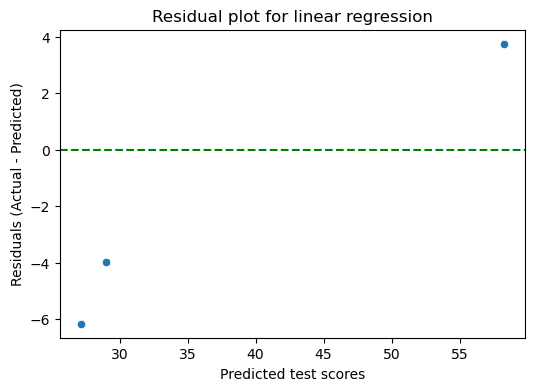

In [37]:
residuals = y_test - test_prediction

plt.figure(figsize=(6, 4))
sns.scatterplot(x=test_prediction, y=residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted test scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual plot for linear regression')
plt.show()

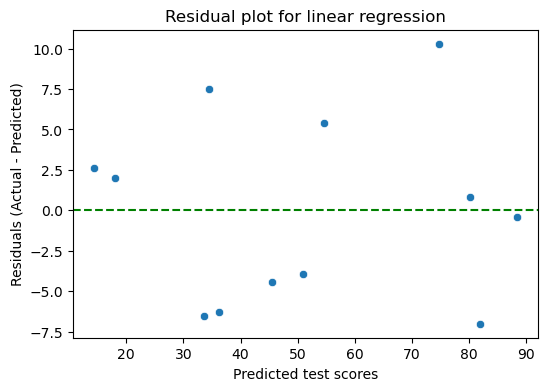

In [38]:
residuals = y_train - train_prediction

plt.figure(figsize=(6, 4))
sns.scatterplot(x=train_prediction, y=residuals)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted test scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual plot for linear regression')
plt.show()